In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

- Binary classification

In [2]:
df = pd.read_csv("titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### No duplicated data

In [8]:
len(df[df.duplicated()])

0

In [9]:
# rename columns
df.rename(columns={
    "PassengerId": "id", 
    "Survived": "target",
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)

### Drop name variable for privacy

In [10]:
df.drop("name", axis=1, inplace=True)

### Analysis of Pclass variable

- No Missing variables
- Categorical variable (Already cleaned)
    - 1 - upper class
    - 2 - Middle clas
    - 3 - lower class
- Change the order of the class so as to reflect socio-economic status

In [11]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df["pclass"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [13]:
def catergorical_plot(x_ax, title, x_label,y_label=None):
    plt.figure(figsize=(10,5))
    sns.countplot(df,x=x_ax)
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

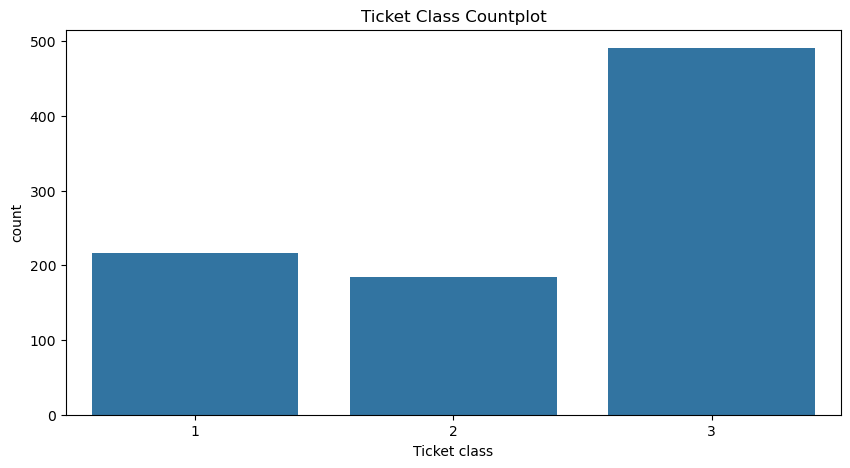

In [14]:
catergorical_plot("pclass", "Ticket Class Countplot", "Ticket class")

## Analysis for Sex variable

- No missing data
- Categorial data
    - One-hot encoding
    

In [15]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

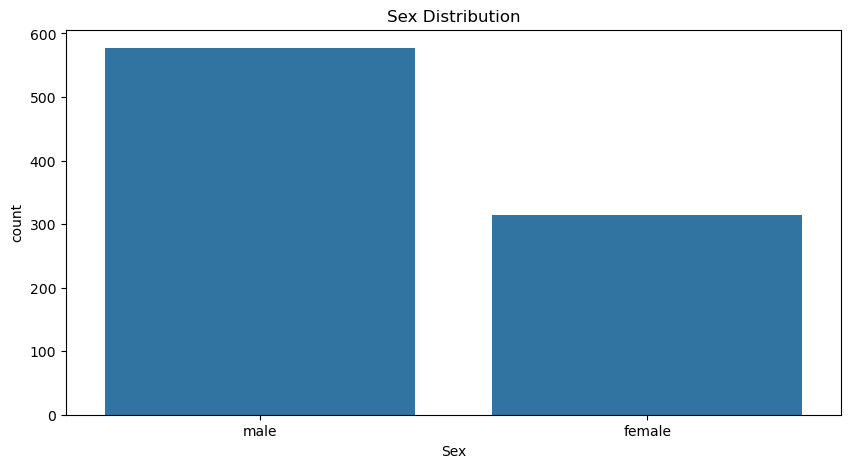

In [16]:
# countplot for sex distibution
catergorical_plot("sex", "Sex Distribution", "Sex")

## Analysis for Age Variable
- Missing values in age, fill with the median age
- Average age is 29, Median 28
- Categorize the data into age group during feature engineering

In [17]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [18]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

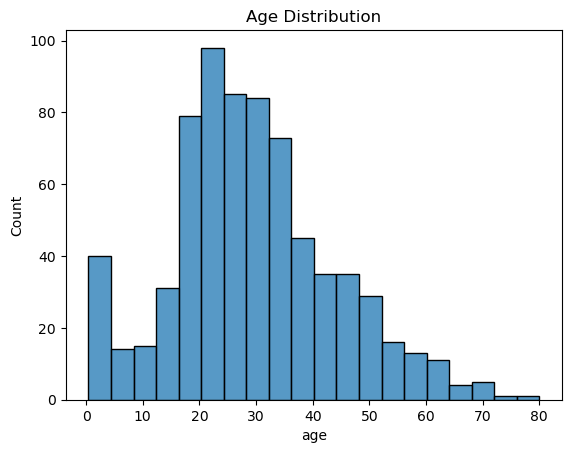

In [19]:
sns.histplot(data=df,x='age')
plt.title('Age Distribution');
plt.show()

In [20]:
# bins = [0, 12, 18, 35, 60, 100]
# labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [21]:
df.head()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df[~df["age"].isna()].head()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Analysis for sib/sp (Siblings/Spouse on board)

- Numerical data
- No missing value

In [23]:
df["sibsip"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsip, dtype: float64

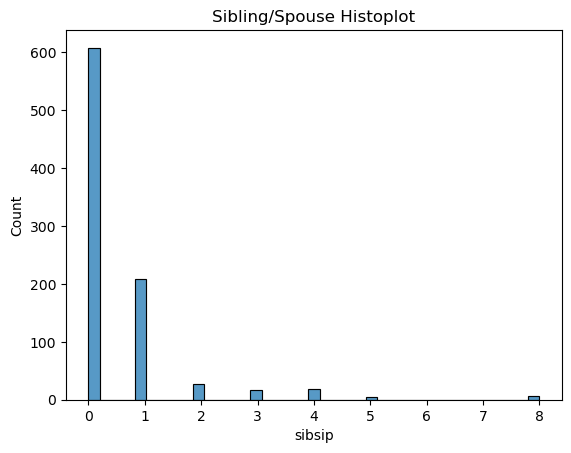

<Figure size 1000x1000 with 0 Axes>

In [24]:
sns.histplot(data=df, x="sibsip")
plt.title("Sibling/Spouse Histoplot")
plt.figure(figsize=(10,10));
plt.show()

## Analysis for No of parents / children aboard the Titanic

- Numerical Data
- No missing data


In [25]:
df["parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

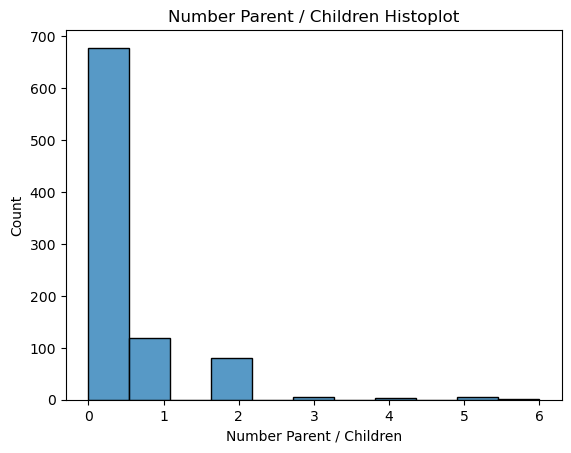

<Figure size 1000x1000 with 0 Axes>

In [26]:
sns.histplot(data=df, x="parch")
plt.title("Number Parent / Children Histoplot")
plt.xlabel("Number Parent / Children")
plt.figure(figsize=(10,10));
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   target    891 non-null    int64  
 2   pclass    891 non-null    int64  
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsip    891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Ticket Analysis

- object data type
- No missing data
- It seems the Ticket are given based on the family registration
- Target Encoding

In [28]:
df["ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [29]:
df["ticket"].isna().sum()

0

In [30]:
df["ticket"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [31]:
df["ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: ticket, dtype: object

In [32]:
df["ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [33]:
df["ticket"].value_counts().head(10)

ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

## Fare Analysis

- Datatype : float
- No missing values
- present of outlier

In [34]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [35]:
df["fare"].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

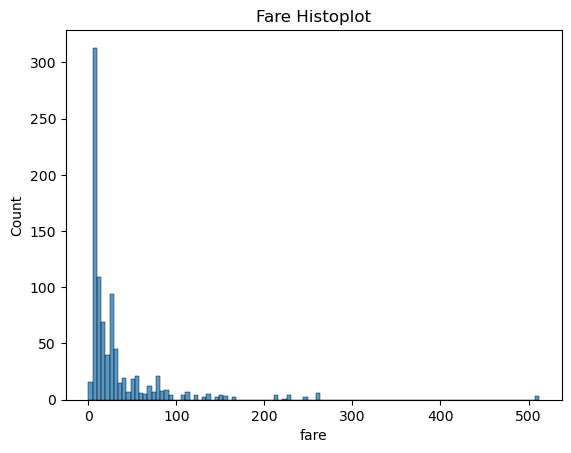

<Figure size 640x480 with 0 Axes>

In [36]:
sns.histplot(df, x="fare")
plt.title("Fare Histoplot")
plt.figure()
plt.show()

## Cabin Analysis

- present of missing values
- 147 unique data
- 687 missing data
- data-type is String
- replace missing values with "missing"
- encode with frequency (Frequency Encode)
- Better still use only the first letter to represent each cabin
<!-- - Probal -->

In [37]:
df["cabin"].value_counts()

cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [38]:
df.cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: cabin, dtype: object

In [39]:
df["cabin"].isna().sum()

687

In [40]:
df[df["pclass"] == 1 & ~df["cabin"].isna()].tail()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


## Analysis of Embarked cols

- Categorical data (3 categories)
- Port of Embarkation
- 2 missing inputs
- Probabily fill with it mode

In [41]:
df["embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [42]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
df["embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [44]:
# check for missing values in embarked cols
df["embarked"].isna().sum()

2

In [45]:
df[df["embarked"].isna()]

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


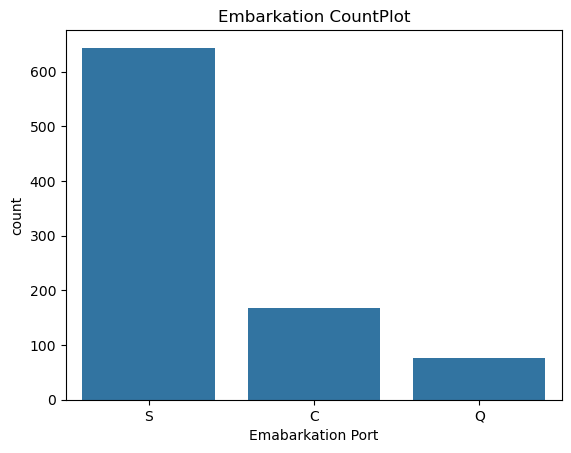

In [46]:
sns.countplot(df, x='embarked')
plt.xlabel("Emabarkation Port")
plt.title("Embarkation CountPlot")
plt.show()

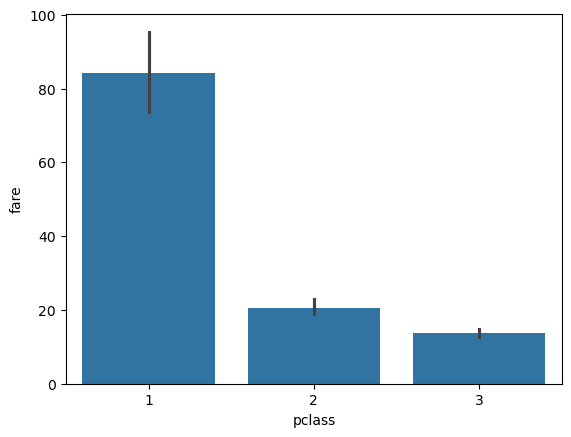

In [47]:
sns.barplot(x="pclass", y="fare", data=df)
plt.show()

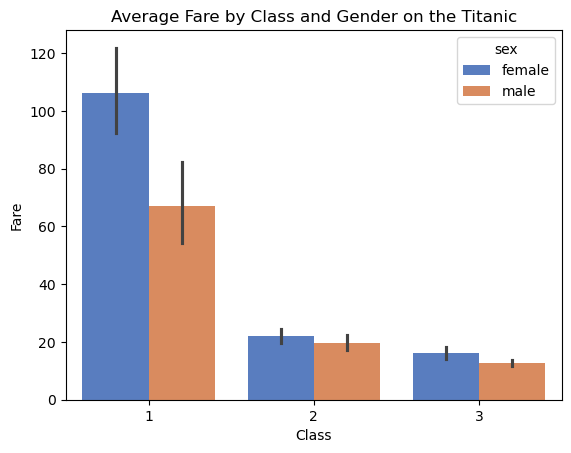

In [48]:
sns.barplot(x="pclass", y="fare", hue="sex", palette="muted", data=df)




# add labels and title

plt.xlabel("Class")

plt.ylabel("Fare")

plt.title("Average Fare by Class and Gender on the Titanic")




# display the plot

plt.show()

# Train-Validation split

### Looking for correlation

In [49]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

### Preprocessing pclass and cabin features

In [50]:
# reverse order of pclass
df['pclass'] = df['pclass'].map({1: 3, 2: 2, 3: 1})

In [51]:
df["cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: cabin, Length: 891, dtype: object

In [52]:
# use the first letter to represent each cabin cols
df["cabin"] = df["cabin"].fillna(value ="missing")
df["cabin"] = df["cabin"].astype(str).apply(lambda x: x[0])
df["cabin"]

    

0      m
1      C
2      m
3      C
4      m
      ..
886    m
887    B
888    m
889    C
890    m
Name: cabin, Length: 891, dtype: object

In [53]:
def  preprocessing_plcass_cabin(df):
    df["cabin"] = df["cabin"].fillna(value ="missing")
    df["cabin"] = df["cabin"].astype(str).apply(lambda x: x[0])
    df['pclass'] = df['pclass'].map({1: 3, 2: 2, 3: 1})

In [54]:
# spliting data into train and validation data
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(df,random_state=42, test_size=0.2)

In [55]:
titanic =train_data.copy()

In [56]:
titanic.head()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
331,332,0,3,male,45.5,0,0,113043,28.5000,C,S
733,734,0,2,male,23.0,0,0,28425,13.0000,m,S
382,383,0,1,male,32.0,0,0,STON/O 2. 3101293,7.9250,m,S
704,705,0,1,male,26.0,1,0,350025,7.8542,m,S
813,814,0,1,female,6.0,4,2,347082,31.2750,m,S


In [57]:
from pandas.plotting import scatter_matrix

attributes = ["target","fare", "parch"]
scatter_matrix(titanic[attributes], figsize=(12,8));

In [58]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

### Preparing Data For ML

In [59]:
# change the order of pclass to the reverse

In [60]:

titanic["target"].isna().sum()

0

In [61]:
# titanic["target"].hist()
sns.countplot(titanic, x="target")

<Axes: xlabel='parch', ylabel='parch'>

### Handle Missing Values

In [62]:
titanic["target"].head()

331    0
733    0
382    0
704    0
813    0
Name: target, dtype: int64

In [63]:
# Split data into labels and feature

titanic_label = titanic["target"].copy()
titanic.drop("target", inplace=True, axis=1)


# 

## Setting up pipeline

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, TargetEncoder,StandardScaler

# Age: With the median -> 28
# Cabin: with the word missing "missing"
# Embarked: with the mode -> s


age_pipeline = Pipeline([
    ("age_imputer", SimpleImputer(strategy="median")),
     ("age_scaler", StandardScaler()),
    ])

cabin_pipeline = Pipeline([
     ("cabin_imputer", SimpleImputer(fill_value="missing", strategy="constant")),
    ("cabin_encoder", TargetEncoder()),
])

sex_pipeline = Pipeline([
      ("sex_encoder", OneHotEncoder(drop="if_binary")),
])


embarked_pipeline = Pipeline([
    ("embarked_imputer", SimpleImputer(strategy="most_frequent")),
     ("embarked", OneHotEncoder()),
])

ticket_pipeline = Pipeline([
    ("ticket_encoder", TargetEncoder()),
])

### Encoding of Categorical Data and Scaling of Data

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       572 non-null    float64
 4   sibsip    712 non-null    int64  
 5   parch     712 non-null    int64  
 6   ticket    712 non-null    object 
 7   fare      712 non-null    float64
 8   cabin     712 non-null    object 
 9   embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [66]:
from sklearn.compose import ColumnTransformer 

# Sex: One hot encoding
# Cabin: Frequency encoding | Target encode
# Ticket: Frequency encoding | Target encode
# embarked: One hot encoding


categorical_pipe = ColumnTransformer([
    ("cabin_cat", cabin_pipeline, ["cabin"]),
    ("ticket_cat",ticket_pipeline, ["ticket"]),
    ("sex_cat", sex_pipeline, ["sex"]),
    ("embarked_cat", embarked_pipeline, ["embarked"])
])


numerical_pipeline = ColumnTransformer([
   ("num_data", age_pipeline, ["age"]),
    ("scalers", StandardScaler(), ["sibsip","fare","parch"])
])



In [67]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline = ColumnTransformer([
    ("num_data", numerical_pipeline, ["age", "sibsip","fare","parch"]),
    ("cat_data", categorical_pipe, ["cabin","ticket","sex","embarked"])
], remainder="passthrough")

In [68]:
titanic_prepared = full_pipeline.fit_transform(titanic, titanic_label)

In [69]:
titanic.head()

,id,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
331,332,3,male,45.5,0,0,113043,28.5000,C,S
733,734,2,male,23.0,0,0,28425,13.0000,m,S
382,383,1,male,32.0,0,0,STON/O 2. 3101293,7.9250,m,S
704,705,1,male,26.0,1,0,350025,7.8542,m,S
813,814,1,female,6.0,4,2,347082,31.2750,m,S


## Model selection and training

### using `RandomForestClassifier()`

In [70]:
# using ensemble model
from sklearn.ensemble import RandomForestClassifier



rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(titanic_prepared, titanic_label)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def calculate_rmse_(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
# yse mse
mse_score = cross_val_score(rfc_model, titanic_prepared, titanic_label, scoring="neg_mean_squared_error", cv=10) 
rmse_score = np.sqrt(-mse_score)
calculate_rmse_(rmse_score)

Scores: [0.372678   0.44095855 0.51730613 0.29070095 0.41111323 0.44405304
 0.48932261 0.42790021 0.45963856 0.26537245]
Mean: 0.4119043722517601
Standard deviation: 0.07695220971471385


In [72]:
validation_X = valid_data.drop("target", axis=1)
validation_y = valid_data["target"]


transformed_validation_x = full_pipeline.transform(validation_X)
rfc_model.score(transformed_validation_x, validation_y)

0.8379888268156425

In [73]:
# rsme without cross-validation
titanic_survival_prediction = rfc_model.predict(transformed_validation_x)
rfc_mse = mean_squared_error(validation_y, titanic_survival_prediction)
rfc_rmse = np.sqrt(rfc_mse)
rfc_rmse

0.4025061157105039

### Using `GradientBoostingClassifier`

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(titanic_prepared, titanic_label)

GradientBoostingClassifier(random_state=42)

In [75]:
gbc_mse_score = cross_val_score(gbc_model, titanic_prepared, titanic_label, scoring="neg_mean_squared_error", cv=10)
gbc_rsme_score = np.sqrt(-gbc_mse_score)
calculate_rmse_(gbc_rsme_score)

Scores: [0.35355339 0.45643546 0.51730613 0.31399291 0.37529331 0.48932261
 0.50350881 0.39361095 0.45963856 0.29070095]
Mean: 0.4153363096704372
Standard deviation: 0.07680824003899103


In [76]:
gbc_model.score(transformed_validation_x, validation_y)

0.8268156424581006

In [77]:
gbc_pred_mse = mean_squared_error(validation_y,titanic_survival_prediction)
gbc_rmse = np.sqrt(gbc_pred_mse)
gbc_rmse

0.4025061157105039

## Fine Tuning model

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GradientBoostingClassifier parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}


# RandomizedSearchCV for RandomForestClassifier
rf_random_search = RandomizedSearchCV(estimator=rfc_model,
                                      param_distributions=rf_param_grid,
                                      n_iter=100,  # Number of iterations
                                      cv=5,  # 5-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1, scoring='neg_mean_squared_error')

# RandomizedSearchCV for GradientBoostingClassifier
gb_random_search = RandomizedSearchCV(estimator=gbc_model,
                                      param_distributions=gb_param_grid,
                                      n_iter=100,  # Number of iterations
                                      cv=5,  # 5-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1, scoring='neg_mean_squared_error')


In [79]:
# Fit the RandomForest model
rf_random_search.fit(titanic_prepared, titanic_label)

# Fit the GradientBoosting model
gb_random_search.fit(titanic_prepared, titanic_label)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\monda\anaconda3\envs\titanic_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.05],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
# Best parameters and score for RandomForestClassifier
print("Best RandomForest Parameters:", rf_random_search.best_params_)
print("Best RandomForest Score:", rf_random_search.best_score_)

# Best parameters and score for GradientBoostingClassifier
print("Best GradientBoosting Parameters:", gb_random_search.best_params_)
print("Best GradientBoosting Score:", gb_random_search.best_score_)


Best RandomForest Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best RandomForest Score: -0.16713286713286712
Best GradientBoosting Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}
Best GradientBoosting Score: -0.15872156013001085


In [81]:
rf_ranking = pd.DataFrame(rf_random_search.cv_results_).sort_values(by="rank_test_score").head()
rf_ranking

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.377373,0.027802,0.015083,0.004512,100,10,4,sqrt,20,False,"{'n_estimators': 100, 'min_samples_split': 10,...",-0.160839,-0.174825,-0.147887,-0.197183,-0.15493,-0.167133,0.017442,1
36,0.861630,0.077049,0.034622,0.012302,200,10,1,sqrt,40,False,"{'n_estimators': 200, 'min_samples_split': 10,...",-0.153846,-0.174825,-0.161972,-0.190141,-0.15493,-0.167143,0.013716,2
35,2.591616,0.146618,0.074849,0.013965,500,2,4,log2,None,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",-0.160839,-0.153846,-0.169014,-0.197183,-0.15493,-0.167162,0.015948,3
62,2.526233,0.241734,0.064890,0.012021,500,2,4,log2,30,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",-0.160839,-0.153846,-0.169014,-0.197183,-0.15493,-0.167162,0.015948,3
15,2.357858,0.455112,0.068670,0.007368,500,5,4,sqrt,50,True,"{'n_estimators': 500, 'min_samples_split': 5, ...",-0.160839,-0.153846,-0.169014,-0.197183,-0.15493,-0.167162,0.015948,3


In [82]:
gb_ranking = pd.DataFrame(gb_random_search.cv_results_).sort_values(by="rank_test_score").head()
gb_ranking

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
57,1.198341,0.051436,0.002739,0.002259,0.8,300,2,2,log2,4,0.01,"{'subsample': 0.8, 'n_estimators': 300, 'min_s...",-0.160839,-0.146853,-0.154930,-0.183099,-0.147887,-0.158722,0.013201,1
70,1.125260,0.095538,0.005218,0.006671,0.8,200,10,1,sqrt,5,0.01,"{'subsample': 0.8, 'n_estimators': 200, 'min_s...",-0.167832,-0.160839,-0.147887,-0.190141,-0.147887,-0.162917,0.015629,2
93,0.360398,0.088222,0.000804,0.001607,0.9,100,2,1,log2,3,0.05,"{'subsample': 0.9, 'n_estimators': 100, 'min_s...",-0.153846,-0.160839,-0.154930,-0.197183,-0.154930,-0.164346,0.016602,3
61,0.703704,0.044413,0.001104,0.002208,1.0,100,2,2,sqrt,5,0.05,"{'subsample': 1.0, 'n_estimators': 100, 'min_s...",-0.174825,-0.174825,-0.154930,-0.169014,-0.154930,-0.165705,0.009050,4
65,0.498689,0.008690,0.002426,0.004851,1.0,100,2,1,sqrt,4,0.05,"{'subsample': 1.0, 'n_estimators': 100, 'min_s...",-0.160839,-0.174825,-0.140845,-0.190141,-0.161972,-0.165724,0.016346,5


In [89]:
titanic_test_df = pd.read_csv("titanic/test.csv")

titanic_test_df.rename(columns={
    "PassengerId": "id", 
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)


# necesarry preprosing
preprocessing_plcass_cabin(titanic_test_df)

test_X = full_pipeline.transform(titanic_test_df)
test_X

array([[ 4.07411249e-01, -4.70722410e-01, -4.76711649e-01, ...,
         0.00000000e+00,  8.92000000e+02,  1.00000000e+00],
       [ 1.36903603e+00,  3.79923164e-01, -4.92678369e-01, ...,
         1.00000000e+00,  8.93000000e+02,  1.00000000e+00],
       [ 2.52298578e+00, -4.70722410e-01, -4.40929021e-01, ...,
         0.00000000e+00,  8.94000000e+02,  2.00000000e+00],
       ...,
       [ 7.15131180e-01, -4.70722410e-01, -4.87864476e-01, ...,
         1.00000000e+00,  1.30700000e+03,  1.00000000e+00],
       [-9.26336398e-02, -4.70722410e-01, -4.72460019e-01, ...,
         1.00000000e+00,  1.30800000e+03,  1.00000000e+00],
       [-9.26336398e-02,  3.79923164e-01, -1.96945525e-01, ...,
         0.00000000e+00,  1.30900000e+03,  1.00000000e+00]])

In [91]:
np.isnan(test_X).sum()

1

In [86]:
# Predict and evaluate the RandomForest model
# Predict and evaluate the RandomForestRegressor model
rf_best_model = rf_random_search.best_estimator_
rf_predictions = rf_best_model.predict(test_X)
# rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
# print("RandomForest Test RMSE:", rf_test_rmse)

# # Predict and evaluate the GradientBoostingRegressor model
gb_best_model = gb_random_search.best_estimator_
gb_predictions = gb_best_model.predict(test_X)
# gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
# print("GradientBoosting Test RMSE:", gb_test_rmse)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Saving model

In [ ]:
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
# with open("gbc.pkl", "wb") as f:
#     dump(clf, f, protocol=5)
